In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

from math import sqrt

style.use('fivethirtyeight')

import warnings
import numpy as np
import sys
import csv
import random
from collections import Counter

from sklearn import preprocessing, svm, neighbors
from sklearn.model_selection import cross_validate, train_test_split

In [19]:
# definition of the euclidean distance

plot1 = [1,3]
plot2 = [2,5]

euclid_dist = sqrt((plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2) # square root of (x1-x2)^2 + (y1-y2)^2
print('Euclid Dist: ' + str(euclid_dist))

Euclid Dist: 2.23606797749979


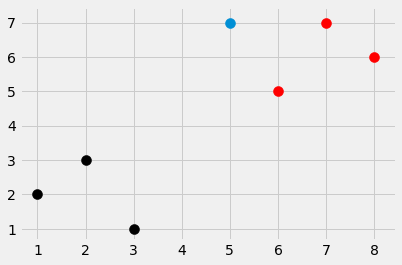

In [20]:
# creating some sample data - "coordinates" in 2D - will be our features for KNN

dataset = {'k':[[1,2],[2,3], [3,1]], 'r':[[6,5],[7,7],[8,6]]} # two sets of groups of coordinates - features

new_features = [5,7] # a new coordinate - which group does this belong to, k or r? - likely r by observation

# plot all points in the group

for group in dataset:
    for feature in dataset[group]:
        plt.scatter(feature[0], feature[1], s=100, color=group)

plt.scatter(new_features[0], new_features[1], s=100) # plot the new point
plt.show()

# blue point does indeed appear to be part of r group just by proximity to r features - apply k-nearest neighbors

In [21]:
# defining k nearest neighbors algorithm
# pass data to trai against, new data we want to predict, k value

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K set to value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            euclid_dist = np.linalg.norm(np.array(features)-np.array(predict)) # lin alg way of euclid dist
            distances.append([euclid_dist, group])
    
    votes = [i[1] for i in sorted(distances)[:k]] # get kth top distances
    vote_result = Counter(votes).most_common(1)[0][0] # 1st most common group in votes
    confidence = Counter(votes).most_common(1)[0][1] / k
    
    return vote_result, confidence

# we are just finding the distances from new point to every point in training data, classified by existing group
# we then sort this list to get the shortest distances and find the most common group

In [22]:
result = k_nearest_neighbors(dataset, new_features, 3)
print(result) # we've predicted that the new point (new_features), belongs in r type

('r', 1.0)


In [23]:
# our model

accuracies = []

for i in range(25):
    # pulling UCI breast cancer data from directory
    df = pd.read_csv(r"breast-cancer-wisconsin.data")

    # editing df
    df.replace('?', -99999, inplace=True)
    df.drop(columns=['id'], inplace=True)
    full_data = df.astype(float).values.tolist()

    random.shuffle(full_data)
    # creating training and testing data

    test_size = 0.2 # 20% of data reserved to test on
    train_set = {2:[], 4:[]} # 2 or 4 -> 2 = non-cancerous, 4 = cancerous
    test_set = {2:[], 4:[]}

    train_data = full_data[:-int(test_size*len(full_data))]
    test_data = full_data[-int(test_size*len(full_data)):]

    for i in train_data:
        train_set[i[-1]].append(i[:-1])

    for i in test_data:
        test_set[i[-1]].append(i[:-1])

    # applying k_nearest neighbors

    correct = 0
    total = 0

    for group in test_set:
        for data in test_set[group]: # group will be 2 or 4
            vote, confidence = k_nearest_neighbors(train_set, data, k=200)
            if group == vote:
                correct += 1
            else:
                print(confidence)
            total += 1
    accuracies.append(correct/total)

print('Accuracies: ', sum(accuracies)/len(accuracies)) # how many tests we perform

0.645
0.865
0.91
0.525
0.81
0.635
0.63
0.89
0.92
0.83
0.78
0.605
0.6
0.53
0.75
0.755
0.58
0.58
0.52
0.62
0.545
0.835
0.92
0.635
0.69
0.765
0.89
0.67
0.89
0.915
0.965
0.555
0.65
0.605
0.82
0.84
0.775
0.72
0.575
0.575
0.635
0.61
0.935
0.84
0.97
0.98
0.75
0.89
0.775
0.53
0.94
0.75
0.755
0.81
0.92
0.885
0.985
0.88
0.575
0.84
0.805
0.915
0.655
0.645
0.98
0.59
0.815
0.89
0.645
0.52
0.91
0.845
0.925
0.985
0.81
0.59
0.625
0.96
0.815
0.8
0.77
0.975
0.995
0.88
0.915
0.815
0.55
0.57
0.79
0.65
0.92
0.67
0.75
0.925
0.88
0.955
0.88
0.555
0.57
0.615
0.62
0.735
0.745
0.75
0.68
0.56
0.91
0.59
0.6
0.67
0.945
0.955
0.985
0.595
0.8
0.63
0.645
0.855
0.535
0.74
0.995
0.955
0.93
0.59
0.655
0.66
0.635
0.93
0.97
0.9
0.615
0.65
0.605
0.725
0.845
0.545
0.895
0.64
0.975
0.625
0.655
0.96
0.675
0.62
0.62
0.925
0.935
0.575
0.885
0.64
0.965
0.715
0.775
0.525
0.755
0.855
0.64
0.915
0.875
0.985
0.745
0.615
0.97
0.87
0.815
0.605
0.64
0.75
0.98
0.63
0.905
0.74
0.58
0.655
0.91
0.92
0.91
0.715
0.64
0.875
0.73
0.73
0.76
0.7

In [24]:
# compare to k_nearest neighbors algorithm

accuracies = []

for i in range(25):

    # pulling data from directory
    df = pd.read_csv(r"breast-cancer-wisconsin.data")

    # editing df
    df.replace('?', -99999, inplace=True)
    df.drop(columns=['id'], inplace=True)

    X = np.array(df.drop(columns=['class'])) # feature
    y = np.array(df['class']) # class/label

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

    clf = neighbors.KNeighborsClassifier() # k-nearest neighbors classifier from sklearn
    clf.fit(X_train, y_train)

    accuracy = clf.score(X_test, y_test)


    accuracies.append(accuracy)

print(sum(accuracies)/len(accuracies)) # how many tests we perform

0.969142857142857


# Testing

In [25]:
# our model - testing

# pulling data from directory
df = pd.read_csv(r"breast-cancer-wisconsin.data")

# editing df
df.replace('?', -99999, inplace=True)
df.drop(columns=['id'], inplace=True)
full_data = df.astype(float).values.tolist()

In [26]:
random.shuffle(full_data)
# creating training and testing data

test_size = 0.2 # 20% of data reserved to test on
train_set = {2:[], 4:[]} # 2 or 4 -> 2 = non-cancerous, 4 = cancerous
test_set = {2:[], 4:[]}

train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [27]:
# populating our dictionaries

# train_set[i[-1]] will be 2 or 4 (last column of set)
# we will use this as id to merge into our dictionaries, where this is a key
# we populate (merge) all data (bunch of lists) up to the classifier

for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

# applying k_nearest neighbors

correct = 0
total = 0

for group in test_set:
    for data in test_set[group]: # group will be 2 or 4
        vote, confidence = k_nearest_neighbors(train_set, data, k=200)
        if group == vote:
            correct += 1
        else:
            print(confidence)
        total += 1
print('Accuracy: ', correct/total)

0.68
0.905
0.645
0.625
0.875
0.53
Accuracy:  0.9568345323741008


In [28]:
k_nearest_neighbors(train_set, data, k=200)

(2, 0.53)